## Case Técnico

In [ ]:
# Bibliotecas para tratar dados

import pandasql import sqldf
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib as mpl
import matplotlib.pyplot as plt

# Configurar para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Configurar para exibir até 15 linhas de um Dataframe do Pandas
pd.set_option("display.max_rows", 15)

# Configurar para exibir todas as colunas de um Dataframe do Pandas
pd.set_option("display.max_columns", None)


In [ ]:
speech = pd.read_excel('BASE_SPEECH_CASE.xlsx')

Vamos exibir as primeiras 5 linhas da base para verificar como ela está estruturada.

In [ ]:
speech.head()

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name
0,405.291992,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Cancelamento,speech,Solicitar cancelamento,2.0,SP,1.0,Site 1,Plano 1
1,405.291992,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Script de FinalizaÃ§Ã£o,script,Script de FinalizaÃ§Ã£o,23.0,SP,1.0,Site 1,Plano 1
2,405.291992,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Transferir Pesquisa de SatisfaÃ§Ã£o,script,Transferir ligaÃ§Ã£o para pesquisa de satisfaÃ...,21.0,SP,1.0,Site 1,Plano 1
3,405.291992,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Bloqueio,speech,Informar bloqueio de linha/plano,18.0,SP,1.0,Site 1,Plano 1
4,405.291992,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Script de FinalizaÃ§Ã£o,script,Script de FinalizaÃ§Ã£o,24.0,SP,1.0,Site 1,Plano 1


Podemos perceber que os dados acentuados estão com problema de codificação. Vamos começar a etapa de tratamento dos dados

## 1- Tratamento dos dados

Para resolver o problema de codificação dos dados, irei criar uma função chamada corrigir_codificacao e aplicarei-a na nossa base.

In [ ]:
def corrigir_codificacao(base):
    if isinstance(base, str):
        try:
            return base.encode('latin1', errors='ignore').decode('utf-8', errors='ignore')
        except Exception:
            return base
    return base

speech = speech.map(corrigir_codificacao)

In [ ]:
speech = speech.map(corrigir_codificacao)

In [ ]:
speech

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name
0,405.291992,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Cancelamento,speech,Solicitar cancelamento,2.0,SP,1.0,Site 1,Plano 1
1,405.291992,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Script de Finalização,script,Script de Finalização,23.0,SP,1.0,Site 1,Plano 1
2,405.291992,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Transferir Pesquisa de Satisfação,script,Transferir ligação para pesquisa de satisfação,21.0,SP,1.0,Site 1,Plano 1
3,405.291992,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Bloqueio,speech,Informar bloqueio de linha/plano,18.0,SP,1.0,Site 1,Plano 1
4,405.291992,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Script de Finalização,script,Script de Finalização,24.0,SP,1.0,Site 1,Plano 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191069,1392.302979,1.546933e+11,2024-07-15 15:34:57:000000,2024-07-15 15:34:57:000000,pos puro,2024-07-15 15:58:09:303000,Informação sobre Plano,speech,Saber plano contratado,23.0,DF,5831.0,Site 4,Plano 50
191070,1392.302979,1.546933e+11,2024-07-15 15:34:57:000000,2024-07-15 15:34:57:000000,pos puro,2024-07-15 15:58:09:303000,Script de Inicialização,script,Script de Inicialização,17.0,DF,5831.0,Site 4,Plano 50
191071,1392.302979,1.546933e+11,2024-07-15 15:34:57:000000,2024-07-15 15:34:57:000000,pos puro,2024-07-15 15:58:09:303000,Confirmação Dados,script,"Confirmação de Nome, CPF, Telefone",12.0,DF,5831.0,Site 4,Plano 50
191072,1392.302979,1.546933e+11,2024-07-15 15:34:57:000000,2024-07-15 15:34:57:000000,pos puro,2024-07-15 15:58:09:303000,Informar Protocolo,script,Informar Protocolo,19.0,DF,5831.0,Site 4,Plano 50


Com base nos dados acima, podemos perceber que o problema de codificação foi corrigido com sucesso! Vamos prosseguir com o tratamento de dados, focando agora em verificar se existem valores nulos em nossa base.

In [ ]:
speech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191074 entries, 0 to 191073
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   audio_length            191072 non-null  object 
 1   callId                  191072 non-null  float64
 2   callDate                191071 non-null  object 
 3   initiatedAt             191068 non-null  object 
 4   segment                 191072 non-null  object 
 5   terminatedAt            191072 non-null  object 
 6   reason                  191072 non-null  object 
 7   reason_type             191072 non-null  object 
 8   subreasons_description  191072 non-null  object 
 9   position                191072 non-null  float64
 10  sgl_uf                  191072 non-null  object 
 11  customer                191072 non-null  float64
 12  site                    191072 non-null  object 
 13  plan_name               191072 non-null  object 
dtypes: float64(3), objec

A base possui 191074 linhas. Porém, a maioria das colunas possui 191072 valores, sendo que a coluna **callDate** possui 191071 valores e coluna **initiatedAt** possui 191068 valores. Vamos investigar isso através da verificação dos valores nulos presentes na base.

In [ ]:
speech[speech.isnull().any(axis=1)]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name
587,955.469971,1.546902e+11,NaN,2024-07-12 14:19:12:000000,pos puro,2024-07-12 14:35:07:470000,Informação sobre Plano,speech,Saber valor pago no plano contratado,10.0,SP,475.0,Site 1,Plano 1
692,358.656006,1.546848e+10,2024-07-06 10:21:54:000000,NaN,pos puro,2024-07-06 10:27:52:656000,Script de Inicialização,script,Script de Inicialização,0.0,AL,625.0,Site 1,Plano 1
695,358.656006,1.546848e+10,2024-07-06 10:21:54:000000,NaN,pos puro,2024-07-06 10:27:52:656000,Questionar Algo Mais,script,Questionar Algo Mais,11.0,AL,625.0,Site 1,Plano 1
1123,1083,1.546855e+10,2024-07-07 10:36:36:000000,NaN,pos puro,2024-07-07 10:54:39:000000,Transferir Pesquisa de Satisfação,script,Transferir ligação para pesquisa de satisfação,10.0,SP,879.0,Site 1,Plano 1
1182,391.48999,1.546824e+11,2024-07-04 18:27:31:000000,NaN,pos puro,2024-07-04 18:34:02:490000,2a Via / Código de Barras,speech,Solicitar segunda via de fatura,4.0,DF,896.0,Site 1,Plano 1
1326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De acordo com as informações acima, podemos perceber que existe 1 valor nulo na coluna **callDate**, 4 valores nulos na coluna **initiatedAt** e 2 linhas vazias. Primeiro vamos eliminar essas linhas vazias e depois trataremos os valores nulos.

In [ ]:
speech = speech[speech.isnull().all(axis=1) == False]

Para tratar os valores nulos presentes nas colunas **callDate** e **initiatedAt** precisamos entender os padrões dessas colunas. Vou observar os valores presentes nas 5 primeiras e 5 ultimas linhas da base.

In [ ]:
speech[['callDate', 'initiatedAt']]

,callDate,initiatedAt
0,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000
1,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000
2,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000
3,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000
4,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000
...,...,...
191069,2024-07-15 15:34:57:000000,2024-07-15 15:34:57:000000
191070,2024-07-15 15:34:57:000000,2024-07-15 15:34:57:000000
191071,2024-07-15 15:34:57:000000,2024-07-15 15:34:57:000000
191072,2024-07-15 15:34:57:000000,2024-07-15 15:34:57:000000


Podemos perceber que nas primeiras e últimas 5 linhas, as colunas **callDate** e **Initiated_at** possuem o mesmo valor. Vamos verificar se esse padrão se repete em todas as linhas da nossa base.

In [ ]:
print(f"As colunas callDate e initiatedAt possuem o mesmo valor em {speech[speech['callDate'] == speech['initiatedAt']].shape[0]} linhas")
print(f"As colunas callDate e initiatedAt possuem valores diferentes em {speech[speech['callDate'] != speech['initiatedAt']].shape[0]} linhas")

As colunas callDate e initiated_at possuem o mesmo valor em 191064 linhas
As colunas callDate e initiated_at possuem valores diferentes em 8 linhas


In [ ]:
speech[speech['callDate'] != speech['initiatedAt']]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name
587,955.469971,1.546902e+11,NaN,2024-07-12 14:19:12:000000,pos puro,2024-07-12 14:35:07:470000,Informação sobre Plano,speech,Saber valor pago no plano contratado,10.0,SP,475.0,Site 1,Plano 1
692,358.656006,1.546848e+10,2024-07-06 10:21:54:000000,NaN,pos puro,2024-07-06 10:27:52:656000,Script de Inicialização,script,Script de Inicialização,0.0,AL,625.0,Site 1,Plano 1
695,358.656006,1.546848e+10,2024-07-06 10:21:54:000000,NaN,pos puro,2024-07-06 10:27:52:656000,Questionar Algo Mais,script,Questionar Algo Mais,11.0,AL,625.0,Site 1,Plano 1
1123,1083,1.546855e+10,2024-07-07 10:36:36:000000,NaN,pos puro,2024-07-07 10:54:39:000000,Transferir Pesquisa de Satisfação,script,Transferir ligação para pesquisa de satisfação,10.0,SP,879.0,Site 1,Plano 1
1182,391.48999,1.546824e+11,2024-07-04 18:27:31:000000,NaN,pos puro,2024-07-04 18:34:02:490000,2a Via / Código de Barras,speech,Solicitar segunda via de fatura,4.0,DF,896.0,Site 1,Plano 1
2728,821.583008,1.546962e+11,2024-07-18 14:20:47:000000,pos puro,pos puro,2024-07-18 14:34:28:583000,Cancelamento,speech,Solicitar cancelamento,5.0,SP,1956.0,Site 1,Plano 1
2919,1211.495972,1.546812e+11,pos puro,2024-07-03 12:39:03:000000,pos puro,2024-07-03 12:59:14:496000,Parcelamento Fatura,speech,Solicitar parcelamento da fatura,9.0,SP,2182.0,Site 1,Plano 1
78864,332,1.546893e+11,2024-07-11 14:57:24:000000,2024-07-ll l4:57:24:000000,pos puro,2024-07-11 15:02:56:000000,Script de Finalização,script,Script de Finalização,5.0,SC,11820.0,Site 1,Plano 4


Analisando as 8 linhas em que as colunas possuem valores diferentes, podemos perceber que isso ocorre por causa de valores nulos ou porque a coluna **callDate** recebeu erroneamente o valor da coluna **segment** ("pos puro").

Dessa forma, podemos verificar o padrão de que as colunas **callDate** e **initiatedAt** possuem o mesmo valor, visto que a data em que a ligação ocorreu é a mesma data/hora que o início da ligação. Sendo assim, irei modificar essas linhas para que os valores dessas duas colunas sejam os mesmos.


In [ ]:
speech['callDate'] = speech['callDate'].fillna(speech['initiatedAt'])
speech['initiatedAt'] = speech['initiatedAt'].fillna(speech['callDate'])
speech.loc[speech['initiatedAt'] == 'pos puro', "initiatedAt"] = speech['callDate']
speech.loc[speech['callDate'] == 'pos puro', "callDate"] = speech['initiatedAt']

A seguir, vamos analisar se as colunas da base possuem irregularidades utilizando expressões regulares.

A coluna **audio_length** recebe apenas valores numéricos, portanto vou verificar se a coluna possui valores de tipos diferentes disso.

In [ ]:
speech[speech['audio_length'].str.contains("[a-zA-Z]", na=False)]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name
7,29 minutos,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Contestação de Conta,speech,Contestar valor fatura,11.0,SP,1.0,Site 1,Plano 1
15,55 horas,1.546791e+11,2024-07-01 11:32:00:000000,2024-07-01 11:32:00:000000,pos puro,2024-07-01 11:38:45:292000,Transferir Pesquisa de Satisfação,script,Transferir ligação para pesquisa de satisfação,20.0,SP,1.0,Site 1,Plano 1
249,39 segundos,1.546804e+11,2024-07-02 16:26:44:000000,2024-07-02 16:26:44:000000,pos puro,2024-07-02 16:36:44:387000,Informação sobre Plano,speech,Saber valor pago no plano contratado,5.0,SP,224.0,Site 1,Plano 1


Existem 3 linhas em que a coluna **audio_length** possui caracteres alfabéticos. Como eu não sei a unidade de tempo utilizada nesta coluna, irei remover os caracteres alfabéticos, deixando apenas os númericos e sempre que possível, irei evitar apagar linhas para não perder informação. Após isso, converterei o tipo desta coluna de object para float.

In [ ]:
speech['audio_length'] = speech['audio_length'].astype(str).str.replace("[a-zA-Z]", "", regex=True)
speech['audio_length'] = speech['audio_length'].astype(float)

A coluna **callID** possui o identificador único de cada ligação. Tal qual a coluna anterior, vou verificar se ela possui algum valor alfabético.

In [ ]:
speech[speech['callId'].astype(str).str.contains("[a-zA-Z]", na=False)]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name


Ela não possui nenhuma irregularidade. Portanto, irei observar a próxima coluna: **callDate**.

In [ ]:
speech[~speech['callDate'].astype(str).str.contains("^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}:\d{6}$", na=False)]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name


A coluna **callDate** não possui irregularidades. Sendo assim, irei apenas converter seu tipo para datetime.

In [ ]:
speech['callDate'] = pd.to_datetime(speech['callDate'], format='%Y-%m-%d %H:%M:%S:%f')

A seguir, irei aplicar a mesma verificação que fiz anteriormente, porém agora com a coluna **initiatedAt**.

In [ ]:
speech[~speech['initiatedAt'].astype(str).str.contains("^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}:\d{6}$", na=False)]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name
78864,332.0,1.546893e+11,2024-07-11 14:57:24,2024-07-ll l4:57:24:000000,pos puro,2024-07-11 15:02:56:000000,Script de Finalização,script,Script de Finalização,5.0,SC,11820.0,Site 1,Plano 4


Existe uma observação na qual o número '1' foi erroneamente trocado por 'l' na coluna **initiatedAt**. Vou corrigir este erro e converterei a coluna para o formato datetime.

In [ ]:
speech['initiatedAt'] = speech['initiatedAt'].astype(str).str.replace("l", "1")
speech['initiatedAt'] = pd.to_datetime(speech['initiatedAt'], format='%Y-%m-%d %H:%M:%S:%f')

Vou observar os valores únicos que a coluna **segment** possui.

In [ ]:
speech['segment'].unique()

array(['pos puro', 'padaria', 'pos controle', 'pre consumer',
       'pos corporate'], dtype=object)

Podemos perceber que 'padaria' não é um nome valido para representar um grupo de classificação de plano. Por este motivo, irei excluir os registros que possuem o segmento com nome igual a 'padaria'.

In [ ]:
speech = speech[speech['segment'] != 'padaria']
speech['segment'] = speech['segment'].astype('string')

Vou verificar se a coluna **terminatedAt** possui algum valor diferente do padrão: 

In [ ]:
speech[~speech['terminatedAt'].astype(str).str.contains("^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}:\d{6}$", na=False)]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name


A coluna **terminatedAt** não possui valores incorretos, por isso irei apenas converter seu tipo para datetime.

In [ ]:
speech['terminatedAt'] = pd.to_datetime(speech['terminatedAt'], format='%Y-%m-%d %H:%M:%S:%f')

Vou observar os valores únicos que a coluna **reason** possui.

In [ ]:
speech['reason'].unique()

array(['Cancelamento', 'Script de Finalização',
       'Transferir Pesquisa de Satisfação', 'Bloqueio',
       'Contestação de Conta', 'Confirmação Dados',
       'Questionar Algo Mais', 'Script de Inicialização',
       'Informar Protocolo', 'Informação sobre Plano',
       'Informação sobre Ofertas', '2a Via / Código de Barras',
       'Transferir Pesquisa de Satisfação e Script de Finalização',
       'Pagamento em Duplicidade', 'Problema Técnico', 'Mudança de Plano',
       'Aplicativo: Instrução de uso do aplicativo', 'Desconto',
       'Ativação de Serviço', 'Demora Atendimento', 'Recarga',
       'Reforço de Sinal', 'Portabilidade', 'Multa Fidelização',
       'Retorno de Contato', 'Bônus', 'Alterar Data de Vencimento',
       'Declaração Perda e Roubo', 'Alterar Dados Cadastrais',
       'Esforço para Resolver', 'Cliente Rechamante',
       'Religa em Confiança', 'Dependente', 'Informação Pix',
       'Induzir ligar novamente', 'Informar Prazo', 'Débito Automático',
       'Len

O padrão que consigo observar é que a coluna **reason** sempre possui a primeira letra iniciando com letra maiuscula ou número. Por isso, vou verificar se ela possui algum resultado iniciando por letra minuscula.

In [ ]:
speech[speech['reason'].astype(str).str.contains("^[a-z]", na=False)]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name


Como pode-se observar, esta coluna não possui irregularidades. Dessa forma, vou converter seu tipo para string e analisarei a próxima coluna: **reason_type**

In [ ]:
speech['reason'] = speech['reason'].astype('string')

Vamos observar os valores únicos presentes na coluna **reason_type**.

In [ ]:
speech['reason_type'].unique()

array(['speech', 'script', 'outros', '-'], dtype=object)

Podemos observar que esta coluna possuí 4 valores únicos: 'speech', 'script', 'outros' e '-'. Os dois primeiros representam respectivamente a fala do cliente e a fala da URA. O valor 'outros' representa outros valores além de 'speech' e 'script'.Como o valor '-' não possui significado claro, irei converte-lo para o valor 'outros', pois ele não corresponde aos valores de 'speech' ou 'script'.

In [ ]:
speech['reason_type'] = speech['reason_type'].astype(str).str.replace("-", "outros")
speech['reason_type'] = speech['reason_type'].astype('string')


Assim como a coluna **reason**, a coluna **subreasons_description** apresenta um padrão de ter seus valores iniciando com a primeira letra maiúsucula ou numérica. Dessa forma, irei aplicar a mesma verificação da coluna **reason** para a coluna **subreasons_description**, verificando se ela possui algum valor que se inicia por letra minuscula.

In [ ]:
speech[speech['subreasons_description'].astype(str).str.contains("^[a-z]", na=False)]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name
4041,613.328003,1.546863e+11,2024-07-08 14:24:29,2024-07-08 14:24:29,pos puro,2024-07-08 14:34:42.328,Confirmação Dados,script,pos puro,3.0,RJ,3229.0,Site 1,Plano 1
114371,342.920013,1.546802e+11,2024-07-02 12:51:31,2024-07-02 12:51:31,pos puro,2024-07-02 12:57:13.920,Confirmação Dados,script,pos puro,3.0,SP,11871.0,Site 3,Plano 5
114383,734.909973,1.546893e+11,2024-07-11 14:49:25,2024-07-11 14:49:25,pos puro,2024-07-11 15:01:39.910,Contestação de Conta,speech,pos puro,4.0,SP,11883.0,Site 3,Plano 5


Podemos verificar que 3 linhas da base possuem a coluna **subreasons_description** com o valor de 'pos puro'. Este valor corresponde ao segmento do plano e não ao detalhamento adicional da reason. Por esse motivo, irei excluir esses registros da base.

In [ ]:
speech = speech[speech['subreasons_description'] != 'pos puro']
speech['subreasons_description'] = speech['subreasons_description'].astype('string')

A coluna **position** representa a ordenação numérica da fala ao longo da conversa. Dessa maneira, vou verificar se ela possui algum valor alfabético.

In [ ]:
speech[speech['position'].astype(str).str.contains("[a-zA-Z]", na=False)]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name


Esta coluna não possui irregularidades. Sendo assim, vou observar a coluna **sgl_uf**. Primeiro irei verificar se ela possui algum valor diferente do padrão de representação de uma unidade federativa e após isso, irei confirmar a validade da coluna, verificando se existem no máximo 27 valores únicos, visto que no Brasil existem 27 unidades federativas.

In [ ]:
speech[~speech['sgl_uf'].astype(str).str.contains("^[A-Z]{2}$", na=False)]

,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name
3259,605.840027,1.546804e+11,2024-07-02 16:25:13,2024-07-02 16:25:13,pos puro,2024-07-02 16:35:18.840,Informação sobre Plano,speech,Saber detalhes sobre limite de internet,11.0,pos puro,2594.0,Site 1,Plano 1
78368,576.000000,1.546813e+11,2024-07-03 15:25:31,2024-07-03 15:25:31,pos puro,2024-07-03 15:35:07.000,Aplicativo: Instrução de uso do aplicativo,script,Instrução de uso de aplicativos corporativos,1.0,Terra mdia,11162.0,Site 1,Plano 4


A coluna **sgl_uf** possui 2 valores que não correspondem ao padrão de unidade federativa: 'pos puro' e 'Terra mdia'. Portanto, irei apagar as linhas da base que contém estes registros e irei verificar se a coluna possui no máximo 27 valores correspondendo às unidades federativas do Brasil.

In [ ]:
speech = speech[~speech['sgl_uf'].isin(['pos puro', 'Terra mdia'])]
speech['sgl_uf'] = speech['sgl_uf'].astype('string')
speech['sgl_uf'].unique()

<StringArray>
['SP', 'MG', 'PR', 'RJ', 'PE', 'SC', 'TO', 'RS', 'PA', 'BA', 'SE', 'AL', 'AM',
 'CE', 'DF', 'GO', 'MA', 'ES', 'PB', 'MT', 'RN', 'MS', 'PI', 'AP', 'AC', 'RR',
 'RO']
Length: 27, dtype: string

Após o tratamento, podemos perceber que a coluna **sgl_uf** possui 27 valores únicos que correspondem às unidades federativas do Brasil. Sendo assim, podemos tratar a próxima coluna: **customer**.

A coluna **customer** representa o identificador númerico do cliente. Por isso, vou verificar se ela possui algum valor alfabético.

In [ ]:
speech[speech['customer'].astype(str).str.contains("[a-zA-Z]", na=False)]


,audio_length,callId,callDate,initiatedAt,segment,terminatedAt,reason,reason_type,subreasons_description,position,sgl_uf,customer,site,plan_name


Não existem irregularidades na coluna **customer**. Vamos então ver os valores únicos presentes na coluna **site**.

In [ ]:
speech['site'].unique()

array(['Site 1', 'Venha ver a promoo do milho', 'pos puro', 'Site 2',
       'Site 3', 'Site 4', 'Site 5', 'Site 6'], dtype=object)

Podemos perceber que 2 valores estão fora do padrão desta coluna: 'Venha ver a promoo do milho' e 'pos puro'. Desse modo, vamos eliminar as linhas que contém estes registros da base.

In [ ]:
speech = speech[~speech['site'].isin(['Venha ver a promoo do milho', 'pos puro'])]
speech['site'] = speech['site'].astype('string')

Por fim, vamos tratar a última coluna da base: a coluna **plan_name**. Vamos verificar os valores únicos presentes nela: 

In [ ]:
speech['plan_name'].unique()

array(['Plano 1', 'pos puro', 'Plano 2', 'Plano 3', 'Plano 4', 'Plano 5',
       'Plano 6', 'Plano 7', 'Plano 8', 'Plano 9', 'Plano 10', 'Plano 11',
       'Plano 12', 'Plano 13', 'Plano 14', 'Plano 15', 'Plano 16',
       'Plano 17', 'Plano 18', 'Plano 19', 'Plano 20', 'Plano 21',
       'Plano 22', 'Plano 23', 'Plano 24', 'Plano 25', 'Plano 26',
       'Plano 27', 'Plano 28', 'Plano 29', 'Plano 30', 'Plano 31',
       'Plano 32', 'Plano 33', 'Plano 34', 'Plano 35', 'Plano 36',
       'Plano 37', 'Plano 38', 'Plano 39', 'Plano 40', 'Plano 41',
       'Plano 42', 'Plano 43', 'Plano 44', 'Plano 45', 'Plano 46',
       'Plano 47', 'Plano 48', 'Plano 49', 'Plano 50'], dtype=object)

Observando atentamente, percebe-se que esta coluna possuí um valor fora do padrão: **'pos puro'**. Sendo assim, vou excluir as linhas que contém este valor da base.

In [ ]:
speech = speech[speech['plan_name'] != 'pos puro']
speech['plan_name'] = speech['plan_name'].astype('string')

In [ ]:
speech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191062 entries, 0 to 191073
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   audio_length            191062 non-null  float64       
 1   callId                  191062 non-null  float64       
 2   callDate                191062 non-null  datetime64[ns]
 3   initiatedAt             191062 non-null  datetime64[ns]
 4   segment                 191062 non-null  string        
 5   terminatedAt            191062 non-null  datetime64[ns]
 6   reason                  191062 non-null  string        
 7   reason_type             191062 non-null  string        
 8   subreasons_description  191062 non-null  string        
 9   position                191062 non-null  float64       
 10  sgl_uf                  191062 non-null  string        
 11  customer                191062 non-null  float64       
 12  site                    191062 non-

A base foi tratada com sucesso e todos os campos estão com o tipo correto. Irei importa-la para o formato csv e prosseguirei para a próxima etapa do case: *Geração de Análises*.

In [ ]:
speech.to_csv('base_tratada.csv', sep=';', encoding='utf-8-sig', index=False)

## 2- Geração de Análises

### Principais reclamações dos clientes

Para descobrir as principais reclamações dos clientes, vou me basear nas informações da coluna **reason** (classificação inicial da fala registrada). Como quero obter as reclamações do cliente, irei filtrar apenas por resultados em que a origem da fala registrada é a fala do cliente.

In [ ]:
reclamacoes_clientes = speech[speech['reason_type'] == 'speech']
total_reclamacoes =  reclamacoes_clientes.groupby(['reason'])['callId']\
                             .nunique()\
                             .reset_index(name='qtd_reclamacoes')\
                             .sort_values(by='qtd_reclamacoes', ascending=False)
total_reclamacoes.head(5)

,reason,qtd_reclamacoes
32,Informação sobre Plano,8844
16,Contestação de Conta,7413
11,Cancelamento,6902
0,2a Via / Código de Barras,5681
44,Problema Técnico,1878


Os valores *'Informação sobre Plano'* e *'2a Via / Código de Barras'* representam solicitações do cliente e não são reclamações. Por isso irei excluir esses registros da base de reclamações.

In [ ]:
total_reclamacoes = total_reclamacoes[(~total_reclamacoes['reason'].isin(['2a Via / Código de Barras'])) & \
                    (~total_reclamacoes['reason'].str.startswith('Informação'))]
total_reclamacoes.head()

,reason,qtd_reclamacoes
16,Contestação de Conta,7413
11,Cancelamento,6902
44,Problema Técnico,1878
36,Mudança de Plano,1838
47,Reclamação Ativação Serviço,1395


**As maiores reclamações dos clientes são:**

- **Contestação de Conta**: *7413* reclamações
- **Cancelamento**: *6902* reclamações
- **Problema Técnico**: *1878* reclamações
- **Mudança de Plano**: *1838* reclamações
- **Reclamação Ativação Serviço**: *1395* reclamações

### Relação entre a quantidade de ligações com outras variáveis

#### Quantidade de ligações por site

In [ ]:
ligacoes_por_site = speech.groupby('site')['callId']\
                          .nunique()\
                          .reset_index(name = 'quantidade_ligacoes')\
                          .sort_values(by='quantidade_ligacoes', ascending=False)
ligacoes_por_site

,site,quantidade_ligacoes
1,Site 2,7501
0,Site 1,4844
2,Site 3,2538
3,Site 4,1125
5,Site 6,20
4,Site 5,17


**Quantidade de ligações por site**

- **Site 2**: *7501* ligações
- **Site 1**: *4844* ligações
- **Site 3**: *2538* ligações
- **Site 4**: *1125* ligações
- **Site 6**: *20* ligações
- **Site 5**: *17* ligações

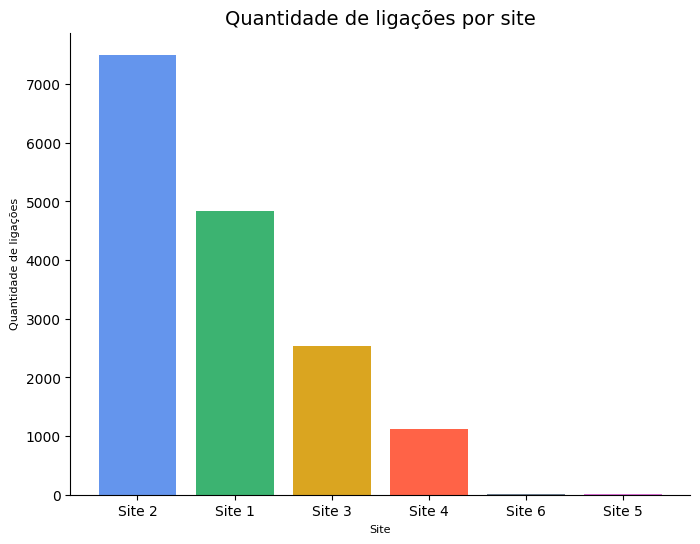

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(
    ligacoes_por_site['site'],
    ligacoes_por_site['quantidade_ligacoes'],
    color = ['#6495ED', '#3CB371', '#DAA520', '#FF6347', '#708090', '#DA70D6']
)

plt.xlabel('Site', fontsize=8)
plt.ylabel('Quantidade de ligações', fontsize=8)
plt.title('Quantidade de ligações por site', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Podemos observar no gráfico acima que o Site 2 possui o maior número de ligações, indicando que ele pode ser o principal centro de atendimento devido a fatores como localização ou maior capacidade de atendimento.

Existe uma grande diferença no número de ligações entre os sites. Enquanto o Site 2 e o Site 1 lideram, os Sites 6 e 5 quase não recebem ligações, sugerindo que podem ser unidades menores ou menos ativas.

Os sites 3 e 4 apresentam um volume moderado, indicando que eles podem atender demandas mais específicas ou possuem uma capacidade menor em comparação com os Sites 1 e 2.

#### Quantidade de ligações por plano

Como a base possui 50 planos diferentes, irei exibir os 10 planos com mais ligações para melhor visualização dos dados.

In [ ]:
ligacoes_por_plano = speech.groupby('plan_name')['callId']\
                          .nunique()\
                          .reset_index(name = 'quantidade_ligacoes')\
                          .sort_values(by='quantidade_ligacoes', ascending=False)
ligacoes_por_plano = ligacoes_por_plano.head(10)
ligacoes_por_plano

,plan_name,quantidade_ligacoes
33,Plano 4,3325
0,Plano 1,2836
22,Plano 3,2616
46,Plano 6,1391
44,Plano 5,867
9,Plano 18,823
17,Plano 25,532
48,Plano 8,492
2,Plano 11,396
47,Plano 7,393


**Quantidade de ligações por plano**

- **Plano 4**: *3325* ligações
- **Plano 1**: *2836* ligações
- **Plano 3**: *2616* ligações
- **Plano 6**: *1391* ligações
- **Plano 5**: *867* ligações
- **Plano 18**: *823* ligações
- **Plano 25**: *532* ligações
- **Plano 8**: *492* ligações
- **Plano 11**: *396* ligações
- **Plano 17**: *393* ligações

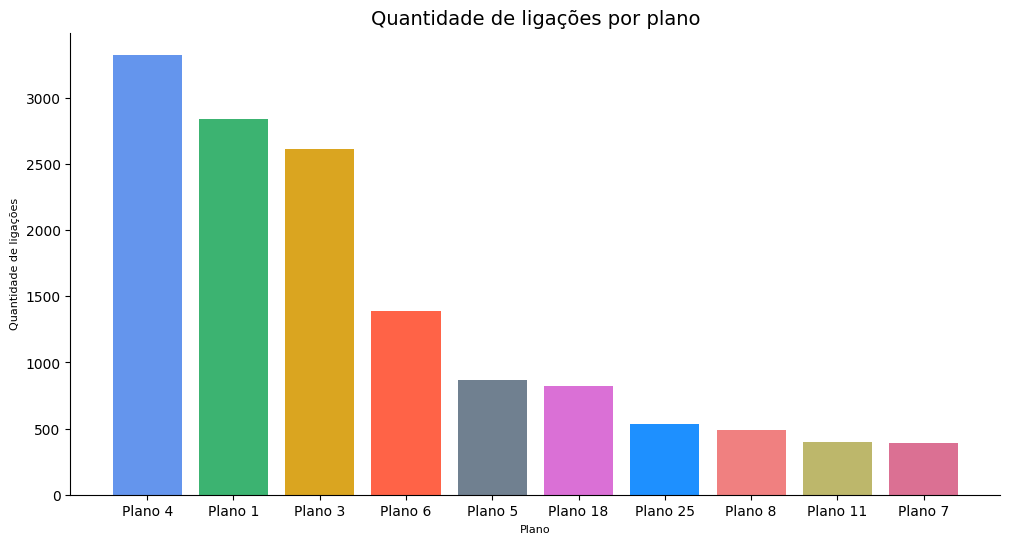

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(
    ligacoes_por_plano['plan_name'],
    ligacoes_por_plano['quantidade_ligacoes'],
    color = ['#6495ED', '#3CB371', '#DAA520', '#FF6347', '#708090',
          '#DA70D6', '#1E90FF', '#F08080', '#BDB76B', '#DB7093']
)

plt.xlabel('Plano', fontsize=8)
plt.ylabel('Quantidade de ligações', fontsize=8)
plt.title('Quantidade de ligações por plano', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Podemos observar pelo gráfico acima que a quantidade de ligações não é distribuida igualmente entre os planos. Os planos 4, 1 e 3 dominam grande parte das interações com o cliente, o que sugere que eles podem ser os mais relevantes ou mais problemáticos.

O plano 6 apresenta um volume moderado, mostrando que ele possui alguma relevância, porém menor do que os planos 4, 1 e 3.  

Os planos 5, 18, 25, 8, 11 e 7 possuem volumes muito menores do que os outros planos. Isso pode indicar que eles tem um menor número de clientes ou um menor número de problemas.

#### Quantidade de ligações por UF

Como a base possui 27 unidades federativas diferentes, irei exibir as 10 unidades federativas com mais ligações para melhor visualização dos dados.

In [ ]:
ligacoes_por_uf = speech.groupby('sgl_uf')['callId']\
                          .nunique()\
                          .reset_index(name = 'quantidade_ligacoes')\
                          .sort_values(by='quantidade_ligacoes', ascending=False)
ligacoes_por_uf = ligacoes_por_uf.head(10)
ligacoes_por_uf

,sgl_uf,quantidade_ligacoes
25,SP,5069
18,RJ,3076
10,MG,1610
17,PR,1555
4,BA,631
23,SC,583
15,PE,534
6,DF,411
13,PA,404
8,GO,394


**Quantidade de ligações por UF**

- **SP**: *5069* ligações
- **RJ**: *3076* ligações
- **MG**: *1610* ligações
- **PR**: *1555* ligações
- **BA**: *631* ligações
- **SC**: *583* ligações
- **PE**: *534* ligações
- **DF**: *411* ligações
- **PA**: *404* ligações
- **GO**: *394* ligações

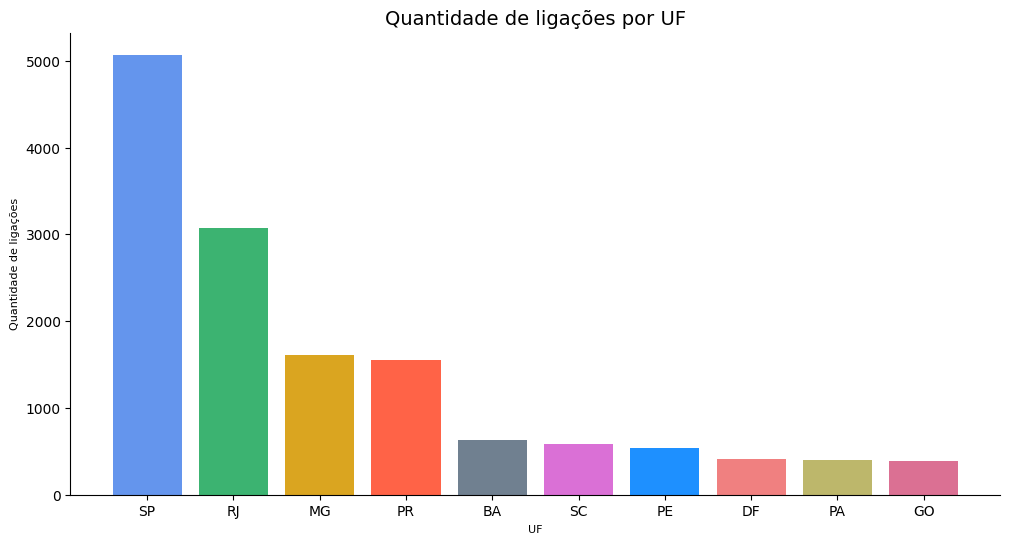

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(
    ligacoes_por_uf['sgl_uf'],
    ligacoes_por_uf['quantidade_ligacoes'],
    color = ['#6495ED', '#3CB371', '#DAA520', '#FF6347', '#708090',
          '#DA70D6', '#1E90FF', '#F08080', '#BDB76B', '#DB7093']
)

plt.xlabel('UF', fontsize=8)
plt.ylabel('Quantidade de ligações', fontsize=8)
plt.title('Quantidade de ligações por UF', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Podemos observar no gráfico acima que São Paulo lidera o volume de ligações. Isso pode ser atribuido a alta densidade populacional do estado, a uma maior base de clientes ou a um número maior de problemas nesta região.

Rio de Janeiro fica em segundo lugar e mesmo estando abaixo de São Paulo, apresenta um número expressivo de ligações, o que reforça sua importância no total de atendimentos.

Minas Gerais e Paraná mostram volumes  intermediários, sugerindo uma menor concentração de problemas ou uma base de clientes menor se comparada com São Paulo e Rio de Janeiro.

Os estados de Bahia, Santa Catarina, Pernambuco, Distrito Federal, Pará e Goias possuem os menores volumes. Isso pode ser reflexo de uma operação mais eficiente ou de uma base de clientes menor.

Além de explorar a quantidade de ligações por UF, acho interessante analisar a quantidade de ligações por região do Brasil. Sendo assim, vou criar uma coluna 'região' identificando a região em que foi feita a ligação de acordo com a UF.

#### Quantidade de ligações por região

In [ ]:
regiao_centro_oeste = ['GO', 'MT', 'MS', 'DF']
regiao_norte = [ 'AM', 'PA', 'AC', 'RO', 'RR', 'AP', 'TO']
regiao_nordeste = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
regiao_sudeste = ['MG', 'SP', 'RJ', 'ES']
regiao_sul = ['PR', 'SC', 'RS']

In [ ]:
def mapear_regiao(uf):
    if uf in regiao_centro_oeste:
        return 'Centro-Oeste'
    elif uf in regiao_norte:
        return 'Norte'
    elif uf in regiao_nordeste:
        return 'Nordeste'
    elif uf in regiao_sudeste:
        return 'Sudeste'
    elif uf in regiao_sul:
        return 'Sul'

In [ ]:
speech['regiao'] = speech['sgl_uf'].apply(mapear_regiao)

Agora que a coluna **regiao**  foi criada, podemos analisar a quantidade de ligações por região

In [ ]:

ligacoes_por_regiao = speech.groupby('regiao')['callId']\
                          .nunique()\
                          .reset_index(name = 'quantidade_ligacoes')\
                          .sort_values(by='quantidade_ligacoes', ascending=False)

total_ligacoes = ligacoes_por_regiao['quantidade_ligacoes'].sum()
ligacoes_por_regiao['percentual'] = round((ligacoes_por_regiao['quantidade_ligacoes'] / total_ligacoes) * 100, 1)
ligacoes_por_regiao

,regiao,quantidade_ligacoes,percentual
3,Sudeste,9809,61.2
4,Sul,2412,15.0
1,Nordeste,2177,13.6
0,Centro Oeste,961,6.0
2,Norte,678,4.2


**Quantidade de ligações por região**

- **Região Sudeste**: *9809* ligações, representando *61.2%* do total de ligações efetuadas.
- **Região Sul**: *2412* ligações, representando *15%* do total de ligações efetuadas.
- **Região Nordeste**: *2177* ligações, representando *13.6%* do total de ligações efetuadas.
- **Região Centro-Oeste**: *961* ligações, representando *6%* do total de ligações efetuadas.
- **Região Norte**: *678* ligações, representando *4.2%* do total de ligações efetuadas.

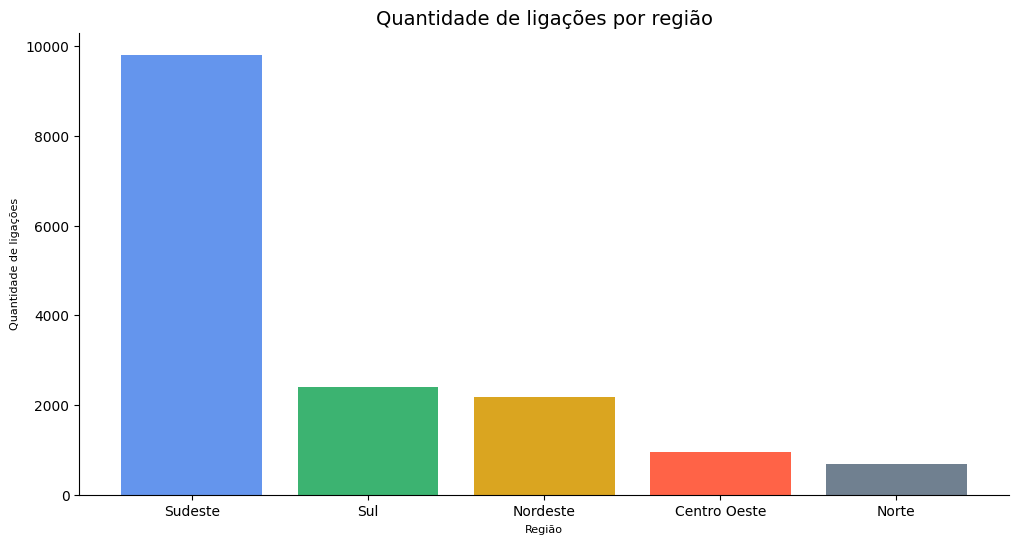

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(
    ligacoes_por_regiao['regiao'],
    ligacoes_por_regiao['quantidade_ligacoes'],
    color = ['#6495ED', '#3CB371', '#DAA520', '#FF6347', '#708090']
)

plt.xlabel('Região', fontsize=8)
plt.ylabel('Quantidade de ligações', fontsize=8)
plt.title('Quantidade de ligações por região', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


De acordo com o gráfico acima, podemos observar a diferença gritante entre a Região Sudeste e as outras regiões. A região Sudeste domina o volume de ligações, correspondendo a mais da metade do total de ligações (61.2%). Isso pode ser explicado por fatores como sua alta densidade populacional, uma maior base de clientes nessa região ou um possível maior número de problemas ou demandas.

As regiões Sul e Nordeste aparecem com volumes intermediários relevantes mas bem abaixo da região Sudeste. Estes números podem indicar uma base de clientes menor ou um atendimento mais eficientes, o que resulta em menos ligações.

Por fim, as regiões Centro-Oeste e Norte apresentam os menores volumes de ligações. Isso pode significar uma presença menor de clientes ou uma estrutura diferente de atendimento, reduzindo assim o número de ligações.

### Reincidência de um mesmo cliente

Irei contabilizar a reincidência de um mesmo cliente baseado na quantidade de ligações que ele fez para um mesmo callcenter.

Primeiro vamos agrupar por customer e site e contar os valores únicos de callId.

In [ ]:
total_reincidencias =  speech.groupby(['customer', 'site'])['callId']\
                             .nunique()\
                             .reset_index(name='reincidencias')

Como queremos calcular as reincidencias, vamos subtrair 1 da quantidade de ligações feitas e obter a quantidade de reincidências, visto que 2 ligações de um mesmo cliente correspondem a uma reincidência. Após isso, vamos remover valores em que o número de reincidencias é igual a 0.

In [ ]:
total_reincidencias['reincidencias'] = total_reincidencias['reincidencias'] - 1
total_reincidencias = total_reincidencias[total_reincidencias['reincidencias'] > 0]

Por fim, vamos ordenar os resultados do total de reincidencias em ordem decrescente para verificar quais clientes tiveram mais reincidências.

In [ ]:
total_reincidencias = total_reincidencias.sort_values(by='reincidencias', ascending=False)
total_reincidencias.head()

,customer,site,reincidencias
1296,1191.0,Site 2,16
307,283.0,Site 2,12
1677,1549.0,Site 4,10
1036,953.0,Site 1,10
2066,1909.0,Site 2,10


Os clientes com maior número de reincidências são: 

- Cliente 1191: 16 reincidências no callcenter Site 2
- Cliente 283: 12 reincidências no callcenter Site 2
- Cliente 1549: 10 reincidências no callcenter Site 4
- Cliente 953: 10 reincidências no callcenter Site 1
- Cliente 1909: 10 reincidências no callcenter Site 2

Essa reincidências podem indicar casos de insatisfação com algum serviço específico ou necessidade de suporte contínuo.